# 1 Linear regression and correlation 

The following dataset is a data frame with 7 economical variables, observed yearly from 1947 to 1962 (n=16).

- GNP.deflator: GNP implicit price deflator (1954=100)
- GNP: Gross National Product.
- Unemployed: number of unemployed.
- Armed Forces: number of people in the armed forces.
- Population: ‘noninstitutionalized’ population ≥ 14 years of age.
- Year: the year (time).
- Employed: number of people employed.

Source
J. W. Longley (1967) An appraisal of least-squares programs from the point of view of the user. Journal of the American Statistical Association 62, 819–841.

Text(0, 0.5, 'Employed')

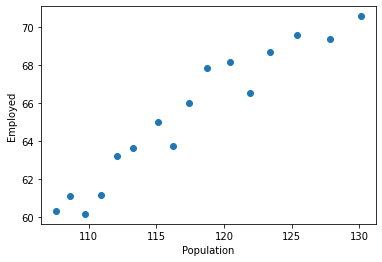

In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# plot input vs output
plt.scatter(x, y)
plt.xlabel('Population')
plt.ylabel('Employed')

Text(0, 0.5, 'Employed')

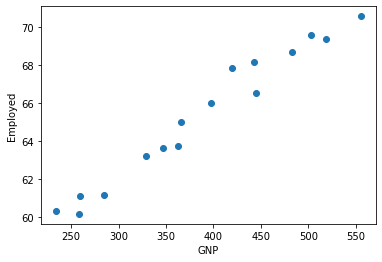

In [2]:
#GNP and employed
x, y = data[:, 1], data[:, -1]
# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP')
plt.ylabel('Employed')

Text(0, 0.5, 'Unemployed')

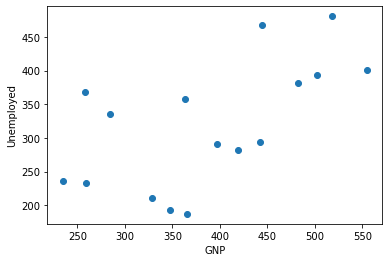

In [3]:
#GNP and UNemployed
x, y = data[:, 1], data[:, 2]
# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP')
plt.ylabel('Unemployed')

Text(0, 0.5, 'Employed')

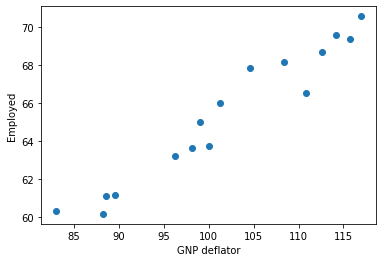

In [4]:
#GNP deflator and Employed
x, y = data[:, 0], data[:, -1]
# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP deflator')
plt.ylabel('Employed')

- Looking at the figures, which variables exhibit a positive correlation index?
- Chose one set of varibles that are linearly correlated and construct a linear regression model to fit them.  
- Choose a next value in the future and predict the corresponding value of your model.

(The topics related to this example can be found in: Example 5.4.3 and Chapter 4.6 from Meyer, "Matrix Analysis and Applied Linear Algebra").

# 2 Eigenfaces

Download the files olivetti_faces.npy and olivetti_faces_target.npy . 

In [5]:
import numpy as np

In [6]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [7]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [8]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

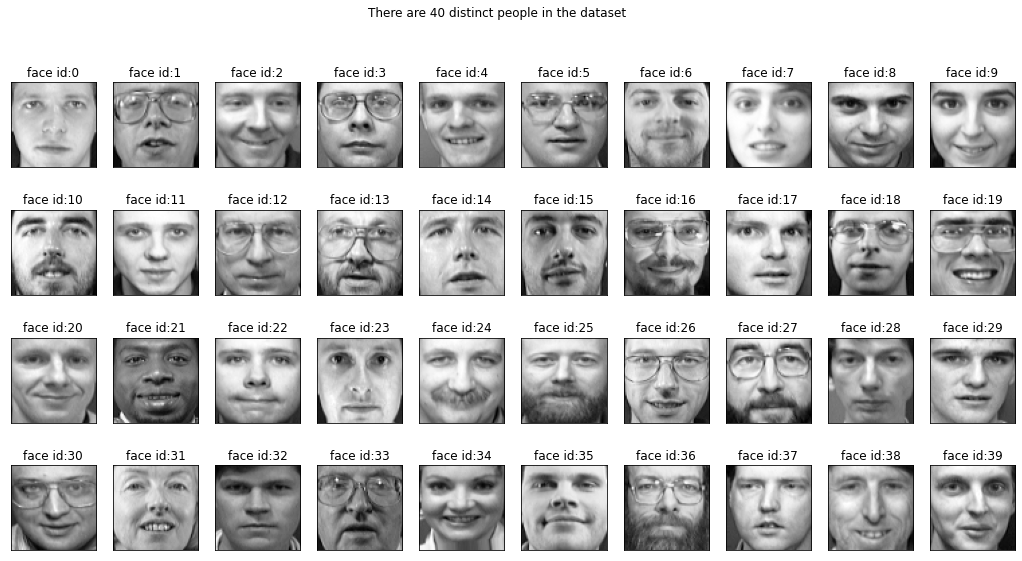

In [9]:
show_40_distinct_people(data, np.unique(target))

In [10]:
#We reshape images for our  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the faces.

- Classify all the faces in the testset and compute the confusion matrix . The element in position $i,j$ of the confusion matrix contains the number of observations known to be in group $i$ and predicted to be in group $j$. Use  sklearn.metrics.confusion_matrix and compute also the classification report using sklearn.metrics.classification_report.

(The topics related to this exercise can be found in: eigenfaceforrecognition-TurkPentland-jcn1991.pdf Chapter 6 from Elden, "Numerical Linear Algebra and Applications in Data Mining")

# 3 Image compression

- How would you "compress" each image in the previous dataset by using any of the studied factorizations?
- Choose one image and plot the compressed one and determine the best $k$ orthogonal bases for its range. The "best $k$" is computed such that the approximated image will have a relative distance in 2-norm from the orignal image less than $10^{-2}$.
Plot the approximated image.

- Use $k$ principal directions for the range of all the images to repeat the classification task by using these directions rather than the whole images.